In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt


In [56]:
#read data file with the iq values
df = pd.read_csv("csvData/IqRgData/jensen2007fig6.csv", skiprows=0,skip_blank_lines=True)
#df = pd.read_csv("csvData/IqRgData/pathak2013fig3b.csv", skiprows=0,skip_blank_lines=True)
#df = pd.read_csv("csvData/IqRgData/nave2004fig5b.csv", skiprows=0,skip_blank_lines=True)
#df = pd.read_csv("csvData/IqRgData/basu2016.csv", skiprows=0,skip_blank_lines=True)
#df = pd.read_csv("csvData/IqRgData/ellis2016.csv", skiprows=0,skip_blank_lines=True)
#df = pd.read_csv("csvData/IqRgData/berthon2021fig3.csv", skiprows=0,skip_blank_lines=True)

#df = pd.read_csv("csvData/IqRgData/Iqpartialdata.csv", skiprows=0,skip_blank_lines=True, index_col =0) #alissons
#df = pd.read_excel("csvData/IqRgData/0.065_TODGA_0.1_OCTANOL_C12_water.xlsx", skiprows=0, index_col =0) #alissons
#remove null lines if any
df = df.dropna(how='all')  #drop emptylines
df.reset_index(drop=True, inplace=True)
df
#About formating of input file :

#Follow the nomenclature for columns
#conditionX : for the Q values
#conditionY : for the I(Q) values

#guinier plot will use
#conditionXX: for Q*Q values
#conditionYYX: for I(q)*Q values


,0mM048Hno301MTODGAX,0mM048Hno301MTODGAY,5mM048HNO301MTODGAX,5mM048HNO301MTODGAY,10mM048HNO301TODGAX,10mM048HNO301TODGAY,14mM048HNO301TODGAX,14mM048HNO301TODGAY
0,0.007178,0.539269,0.007051,0.928463,0.006988,1.488962,0.006682,3.083312
1,0.007922,0.539598,0.007712,0.915866,0.007575,1.489703,0.007243,3.041310
2,0.008359,0.539777,0.008211,0.929337,0.008138,1.479808,0.008065,3.043330
3,0.008901,0.539986,0.008981,0.929851,0.008821,1.480545,0.009061,3.002537
4,0.009225,0.540105,0.009477,0.943475,0.009562,1.470792,0.009911,3.004198
5,0.010090,0.540404,0.010090,0.930520,0.010090,1.471281,0.011036,3.006193
6,0.010647,0.540583,0.011135,0.931086,0.010937,1.472013,0.012399,3.008355
7,0.011750,0.525752,0.012288,0.918504,0.012070,1.452122,0.013931,2.968031
8,0.012623,0.525985,0.013931,0.919215,0.013440,1.453086,0.016516,2.971152
9,0.013561,0.526218,0.015373,0.906794,0.016222,1.444472,0.017743,2.930516


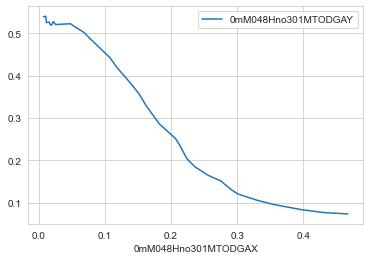

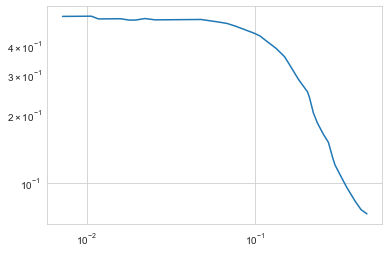

In [57]:
#df.columns[0]
df.plot(x=df.columns[0], y=df.columns[1]) #for others data
#df.plot(x=df.columns[1], y=df.columns[0]) # for allisson data
#yexp= 0.62*np.exp((-df.columns[2].values*df.columns[2].values/8))
#df.plot(x=df.columns[2], y=yexp)
plt.show()

plt.yscale("log")
plt.xscale("log")
plt.plot(df[df.columns[0]], df[df.columns[1]]) #for others data
#plt.plot(df[df.columns[1]], df[df.columns[0]]) #for Allissons data

## Guinier analysis
$ I(q) = I_0 exp(-\frac{q^2 R_g^2}{3}) $


# Guinner plot, q*Iq vs q2
$ q*I(q) = I_0 \sqrt(q^2) exp(-\frac{q^2 R_g^2}{3}) $   has a maxima

maxima is proportional to R_g:
$\frac{d(q*I)}{dq} = I_0 exp(-\frac{q^2 R_g^2}{3}) ( 1 - R_g^2 q^2\frac{2}{3})  \quad \to q_{max}^2 = 3/(2R_g^2)$

In [58]:
#df

In [59]:
#transform the data to qI vs q2
for col in df.columns:
    #print(col)
    if(col[-1] == 'X'):  #search for q values (columns with x ending)
        df[col+'X'] = df[col]*df[col]
        #print(col+'X')
    elif (col[-1] == 'Y' ): #search for Iq values (columns with y ending)
        #print(col[0:-1]+'X')
        df[col+'YX'] = df[col]*df[col[0:-1]+'X']  #for maximum search
        df[col+'log'] = np.log(df[col])  #log for log I fitting (should be more precise)
        df[col+'I'] = 1/df[col]
    else:
        print(col, ' is not with the right nomenclature pattern' )

print("done!")

done!


In [60]:
#df

In [61]:
#adicional plot, if a particular plot is strange
#print(df.columns)
#plt.plot(df['1HNO310ND01TODGAXX'], df['1HNO310ND01TODGAYYX'], label='')

Calculations from the qIq vs q^2 fitting


0mM048Hno301MTODGAYYX
index max q*Iq:  29 , Max iq 0.05417205114492307
q^2 max:  0.02280219491287562
Rg:  8.110680665989936
Correlation Lenght:  6.622343032777394


5mM048HNO301MTODGAYYX
index max q*Iq:  30 , Max iq 0.06405814617617851
q^2 max:  0.020114162087974247
Rg:  8.635642534556906
Correlation Lenght:  7.050972603579757


10mM048HNO301TODGAYYX
index max q*Iq:  23 , Max iq 0.0908345967897581
q^2 max:  0.0115413552567907
Rg:  11.400324803025084
Correlation Lenght:  9.308326223135532


14mM048HNO301TODGAYYX
index max q*Iq:  25 , Max iq 0.11880554407890918
q^2 max:  0.004627747446015066
Rg:  18.003660080993534
Correlation Lenght:  14.699926900316209


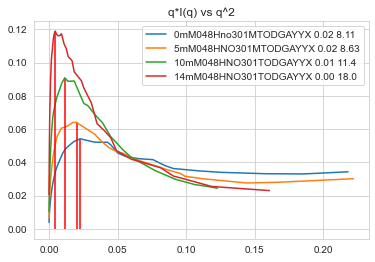

In [62]:
#plot the guinier plots, with maxima
#WARNING: this is a gross estimate, see the fitting method bellow

correlationHistory =[]
print('Calculations from the qIq vs q^2 fitting')
for col in df.columns:
    #print('coluna ', col)
    if(col[-1] == 'X' and col[-2] == 'Y'): #if a Q*I(q) column is reached
        maxIndex = df[col].idxmax()
        qIqmax = df[col].iloc[maxIndex]
        q2max = df[col[0:-3]+'XX'].iloc[maxIndex]

        plt.vlines(q2max, 0, qIqmax, color='red')
        plt.plot(df[col[0:-3]+'XX'], df[col], label=col+' '+str(q2max)[0:4]+' '+str(np.sqrt(1.5/q2max))[0:4])
        plt.title('q*I(q) vs q^2')
        plt.legend()

        print('\n')
        print(col)
        print('index max q*Iq: ', maxIndex, ', Max iq', qIqmax )
        print('q^2 max: ', q2max)
        print('Rg: ', np.sqrt(1.5/q2max))
        print('Correlation Lenght: ', np.sqrt(1.0/q2max))
        correlationHistory.append(np.sqrt(0.25/q2max))

# Guinier analysis
$ I(q) = I_0 exp(-\frac{q^2 R_g^2}{3}) $

in log-y scale
$\ln I(q) = \ln I_0 - \frac{1}{3} q^2 R_g^2 $

## First calculate the correlation length


Calculations from the linear semi-log fitting
0mM048Hno301MTODGAYI  corrLength: 5.457378522146832  fitting error:  [0.00892572]  I0: 0.5349239719243637
5mM048HNO301MTODGAYI  corrLength: 8.76908382229259  fitting error:  [0.00223904]  I0: 0.9306056639351509
10mM048HNO301TODGAYI  corrLength: 7.935876013433199  fitting error:  [0.00048311]  I0: 1.4786941324375726
14mM048HNO301TODGAYI  corrLength: 12.464139093724386  fitting error:  [0.00010674]  I0: 3.0740394789521126


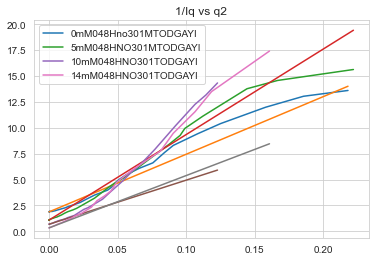

In [63]:
#fittin a line for the first points
#find line of best fit
# suppose Iq = I0 exp(-(1/3)*Rg^2 q^2)
#ln I = ln I0 - (1/3)(Rg^2) q^2
# Rg = sqrt(-3*a), in a  y = ln I = ax + b plot
calculateR = []

''' This parameter adjust how many points are used for the fitting'''
''' starts using the fracIni% points and fits until fraction% points'''
fracIni = 0.00
fraction = 0.40
EHistory = []
I0EHistory = []

print('Calculations from the linear semi-log fitting')
for i,col in enumerate(df.columns):

    if(col[-1] == 'I'):  #search for q values (columns with x ending)

        a, r , _, _, _= np.polyfit(df[col[0:-2]+'XX'][int(len(df[col[0:-2]+'XX'])*fracIni):int(len(df[col[0:-2]+'XX'])*fraction)], df[col][int(len(df[col[0:-2]+'XX'])*fracIni):int(len(df[col[0:-2]+'XX'])*fraction)],
                             1, full=True)
        #print(a[0],a[1], r, fraction)
        #ax+b
        plt.plot(df[col[0:-2]+'XX'],df[col], label=col)
        #plt.plot(df[col[0:-2]+'XX'],(1/a[1])/(np.sqrt(a[0]/a[1])*np.sqrt(a[0]/a[1])*df[col[0:-2]+'XX']+1))
        plt.plot(df[col[0:-2]+'XX'], a[0]*df[col[0:-2]+'XX'] + a[1])
        #plt.xlim([0, 0.2])
        #plt.ylim([0, 150])
        plt.title('1/Iq vs q2')
        plt.legend()

        #the fitting is y = ax+b
        print(col, ' corrLength:', np.sqrt(a[0]/a[1]) ,' fitting error: ', r ,' I0:',1/a[1])

        EHistory.append(np.sqrt(a[0]/a[1]))
        I0EHistory.append(1/a[1])

## Now calculate Radius of gyration

Calculations from the linear semi-log fitting
0mM048Hno301MTODGAYlog  Rg: 6.336950147180004  fitting error:  [0.00170387]  I0: 0.5291262196452092
5mM048HNO301MTODGAYlog  Rg: 10.99429427820703  fitting error:  [0.00373822]  I0: 0.9047584596615846
10mM048HNO301TODGAYlog  Rg: 11.780000415733548  fitting error:  [0.01558093]  I0: 1.4375648784298765
14mM048HNO301TODGAYlog  Rg: 19.331260624175396  fitting error:  [0.00297235]  I0: 3.02840915881829


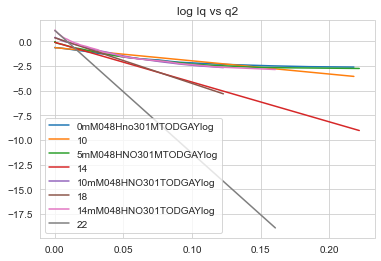

In [64]:
#fittin a line for the first points
#find line of best fit
# suppose Iq = I0 exp(-(1/3)*Rg^2 q^2)
#ln I = ln I0 - (1/3)(Rg^2) q^2
# Rg = sqrt(-3*a), in a  y = ln I = ax + b plot
calculateR = []

''' This parameter adjust how many points are used for the fitting'''
''' starts using the fracIni% points and fits until fraction% points'''
fracIni = 0.15
fraction = 0.55
RgHistory = []
I0History = []

print('Calculations from the linear semi-log fitting')
for i,col in enumerate(df.columns):

    if(col[-1] == 'g'):  #search for q values (columns with x ending)

        a, r , _, _, _= np.polyfit(df[col[0:-4]+'XX'][int(len(df[col[0:-4]+'XX'])*fracIni):int(len(df[col[0:-4]+'XX'])*fraction)], df[col][int(len(df[col[0:-4]+'XX'])*fracIni):int(len(df[col[0:-4]+'XX'])*fraction)],
                             1, full=True)
        #print(a[0],a[1], r, fraction)
        #ax+b
        plt.plot(df[col[0:-4]+'XX'],df[col], label=col)
        plt.plot(df[col[0:-4]+'XX'],a[0]*df[col[0:-4]+'XX']+a[1], label=i)
        #plt.xlim([0, 0.1])
        #plt.ylim([-5, 0])
        plt.title('log Iq vs q2')
        plt.legend()

        #the fitting is y = ax+b
        print(col, ' Rg:', np.sqrt(-3*a[0]) ,' fitting error: ', r ,' I0:',np.exp(a[1]))

        RgHistory.append(np.sqrt(-3*a[0]))
        I0History.append(np.exp(a[1]))

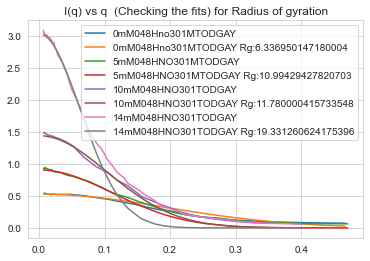

In [65]:
#double checking how good the fitting is to a gaussian...
i = -1
for col in df.columns:
    #print('coluna ', col)
    if(col[-1] == 'Y'): #if a IQ column is reached
        i += 1

        yfitted = I0History[i]*np.exp(-(1/3)*RgHistory[i]*RgHistory[i]*df[col[0:-1]+'X']*df[col[0:-1]+'X'])
        #yoz = I0EHistory[i]/(1+(df[col[0:-1]+'X']*df[col[0:-1]+'X']*EHistory[i]*EHistory[i]))


        plt.plot(df[col[0:-1]+'X'], df[col], label=col)
        plt.plot(df[col[0:-1]+'X'], yfitted, label=col+' Rg:'+str(RgHistory[i]))
        #plt.plot(df[col[0:-1]+'X'], yoz, label=col+' Corre:'+str(correlationHistory[i]))

        plt.title('I(q) vs q  (Checking the fits) for Radius of gyration')
        plt.legend()


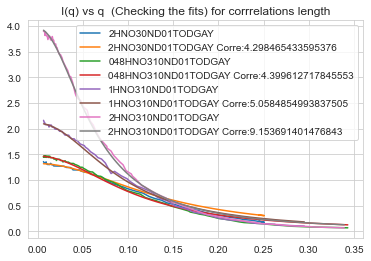

In [50]:
#double checking how good the fitting is to a gaussian...
i = -1
for col in df.columns:
    #print('coluna ', col)
    if(col[-1] == 'Y'): #if a IQ column is reached
        i += 1

        yoz = I0EHistory[i]/(1+(df[col[0:-1]+'X']*df[col[0:-1]+'X']*EHistory[i]*EHistory[i]))
        plt.plot(df[col[0:-1]+'X'], df[col], label=col)
        plt.plot(df[col[0:-1]+'X'], yoz, label=col+' Corre:'+str(correlationHistory[i]))

        plt.title('I(q) vs q  (Checking the fits) for corrrelations length')
        plt.legend()

 q2Max Yox: 0.018738174228603813  q2 max rg: 0.011497569953977287  ratio: 1.6297508346206517 ratio2: 0.6135907273413145
 q2Max Yox: 0.011497569953977287  q2 max rg: 0.007564633275546283  ratio: 1.5199110829529254 ratio2: 0.6579332246575715
 q2Max Yox: 0.008497534359086447  q2 max rg: 0.005590810182512217  ratio: 1.5199110829529363 ratio2: 0.6579332246575669
 q2Max Yox: 0.003764935806792464  q2 max rg: 0.003764935806792464  ratio: 1.0 ratio2: 1.0


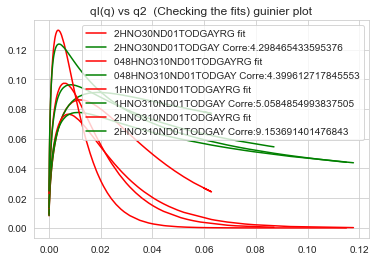

In [51]:
#double checking how good the fitting is to a gaussian...
i = -1
for col in df.columns:
    #print('coluna ', col)
    if(col[-1] == 'Y'): #if a IQ column is reached
        i += 1

        yoz = (df[col[0:-1]+'X']*I0EHistory[i])/(1+(df[col[0:-1]+'XX']*EHistory[i]*EHistory[i]))
        yfitted = df[col[0:-1]+'X']*I0History[i]*np.exp(-(1/3)*RgHistory[i]*RgHistory[i]*df[col[0:-1]+'XX'])
        maxIndex1 = yoz.idxmax()
        maxIndex2 = yfitted.idxmax()


        q2max1 = df[col[0:-1]+'XX'].iloc[maxIndex1]
        q2max2 = df[col[0:-1]+'XX'].iloc[maxIndex2]
        print(' q2Max Yox:', q2max1 , ' q2 max rg:',q2max2, ' ratio:', q2max1/q2max2, 'ratio2:', q2max2/q2max1  )

        plt.plot(df[col[0:-1]+'XX'], yfitted, label=col+'RG fit', color='Red')
        plt.plot(df[col[0:-1]+'XX'], yoz, label=col+' Corre:'+str(correlationHistory[i]), color='green')
        #plt.xlim([0, 0.75])
        #plt.ylim([0, 0.02])
        plt.title('qI(q) vs q2  (Checking the fits) guinier plot')
        plt.legend()

In [52]:
print(np.sqrt(6), np.sqrt(1.5),1/np.sqrt(6), 1/np.sqrt(1.5))

2.449489742783178 1.224744871391589 0.4082482904638631 0.8164965809277261


In [53]:
df

,2HNO30ND01TODGAX,2HNO30ND01TODGAY,048HNO310ND01TODGAX,048HNO310ND01TODGAY,1HNO310ND01TODGAX,1HNO310ND01TODGAY,2HNO310ND01TODGAX,2HNO310ND01TODGAY,2HNO30ND01TODGAXX,2HNO30ND01TODGAYYX,...,048HNO310ND01TODGAYI,1HNO310ND01TODGAXX,1HNO310ND01TODGAYYX,1HNO310ND01TODGAYlog,1HNO310ND01TODGAYI,2HNO310ND01TODGAXX,2HNO310ND01TODGAYYX,2HNO310ND01TODGAYlog,2HNO310ND01TODGAYI,Calculated Rg
0,0.006354,1.358388,0.006280,1.445562,0.006428,2.161383,0.006354,3.892191,0.000040,0.008631,...,0.691772,0.000041,0.013894,0.770748,0.462667,0.000040,0.024730,1.358972,0.256925,NaN
1,0.007221,1.332022,0.006813,1.471689,0.007137,2.119828,0.006973,3.889272,0.000052,0.009618,...,0.679491,0.000051,0.015130,0.751335,0.471736,0.000049,0.027121,1.358222,0.257118,NaN
2,0.008018,1.330898,0.007221,1.443936,0.007653,2.118636,0.007305,3.887813,0.000064,0.010671,...,0.692551,0.000059,0.016214,0.750772,0.472002,0.000053,0.028402,1.357847,0.257214,NaN
3,0.008399,1.330399,0.007653,1.443259,0.008206,2.078488,0.007653,3.886355,0.000071,0.011174,...,0.692876,0.000067,0.017056,0.731640,0.481119,0.000059,0.029743,1.357472,0.257311,NaN
4,0.008799,1.329900,0.008018,1.469758,0.009326,2.076344,0.008018,3.813423,0.000077,0.011702,...,0.680384,0.000087,0.019364,0.730609,0.481616,0.000064,0.030574,1.338527,0.262232,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89,NaN,NaN,0.275039,0.110144,NaN,NaN,0.305386,0.087003,NaN,NaN,...,9.079023,NaN,NaN,NaN,NaN,0.093260,0.026569,-2.441813,11.493855,NaN
90,NaN,NaN,0.281511,0.100359,NaN,NaN,0.312572,0.082273,NaN,NaN,...,9.964217,NaN,NaN,NaN,NaN,0.097701,0.025716,-2.497708,12.154601,NaN
91,NaN,NaN,0.305386,0.084858,NaN,NaN,0.323669,0.077794,NaN,NaN,...,11.784440,NaN,NaN,NaN,NaN,0.104762,0.025179,-2.553697,12.854537,NaN
92,NaN,NaN,0.343047,0.070411,NaN,NaN,0.339081,0.069565,NaN,NaN,...,14.202389,NaN,NaN,NaN,NaN,0.114976,0.023588,-2.665487,14.374954,NaN


In [54]:
df['Calculated Rg'] = pd.Series(calculateR)

/var/folders/3m/_fnws_9153ldq3pbk9643lgm0000gn/T/ipykernel_69943/4186136148.py:1: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  df['Calculated Rg'] = pd.Series(calculateR)


In [18]:
df.to_csv('csvData/IqRgData/berthon2021fig3_Rg.csv')

In [19]:
for i,item in enumerate(RgHistory):
    print('RG:', item, ' Correlation:',EHistory[i], ' Ratio:', item/EHistory[i],' inverse Ratio (E/Rg):', EHistory[i]/item )

RG: 4.1680752728361785  Correlation: 1.618280130588878  Ratio: 2.5756203725491287  inverse Ratio (E/Rg): 0.3882559753983797
RG: 2.218128841795728  Correlation: 1.4927243923903986  Ratio: 1.4859600694564192  inverse Ratio (E/Rg): 0.6729655934602679
RG: 1.7614867783940416  Correlation: nan  Ratio: nan  inverse Ratio (E/Rg): nan
